In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import sys
import pandas as pd

# Add the src directory to the Python path
sys.path.append('../src')
from modeling import CreditScoringModel

In [54]:
# Load the processed dataset
data = pd.read_csv('../data/processed/woe_processed_data.csv')
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFMS_Score,Default_Label,Recency_woe,Frequency_woe,Monetary_woe
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,2,...,119,109921.75,1,3,2,2.10,0,0.131882,1.320930,-2.136510
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,1,...,119,109921.75,1,3,2,2.10,0,0.131882,1.320930,-2.136510
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,2,...,2,1000.00,3,1,1,1.50,0,0.603063,-2.884004,-2.136510
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,2,...,38,228727.20,1,2,3,2.15,0,0.131882,-2.884004,1.174116
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,1,...,38,228727.20,1,2,3,2.15,0,0.131882,-2.884004,1.174116


In [55]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

std_transaction_amount    712
dtype: int64


In [56]:
from sklearn.impute import SimpleImputer

# Select only the numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

In [58]:
# Define the feature columns and target column
feature_columns = [
    'total_transaction_amount', 'average_transaction_amount', 'transaction_count', 'std_transaction_amount',
    'Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_Hour',
    'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies',
    'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv',
    'ProductCategory_utility_bill', 'Amount_standardized', 'Value_standardized', 'Recency', 'Frequency', 'Monetary','Recency_woe'
]

target_column = 'Default_Label'


In [49]:
# Correlation analysis
corr_matrix = data[feature_columns + [target_column]].corr()
print(corr_matrix[target_column])

total_transaction_amount              0.044791
average_transaction_amount            0.054803
transaction_count                     0.186659
std_transaction_amount                0.125243
Transaction_Year                      0.072945
Transaction_Month                    -0.067674
Transaction_Day                       0.020129
Transaction_Hour                     -0.030401
ProductCategory_data_bundles          0.001778
ProductCategory_financial_services   -0.008967
ProductCategory_movies               -0.025152
ProductCategory_other                -0.004726
ProductCategory_ticket                0.006366
ProductCategory_transport            -0.007650
ProductCategory_tv                    0.036325
ProductCategory_utility_bill         -0.000688
Amount_standardized                   0.037791
Value_standardized                    0.033360
Recency                               0.011383
Frequency                             0.186659
Monetary                              0.044791
Recency_Score

In [59]:
# Instantiate the model
model = CreditScoringModel(data, feature_columns, target_column)

In [60]:

# Train the models
model.train()

Random Forest Cross-Validation Accuracy: 1.0000
Gradient Boosting Cross-Validation Accuracy: 1.0000


In [62]:
# Save the trained Random Forest model
model.save_model(model.rf_model, 'random_forest')

# Save the trained Gradient Boosting model
model.save_model(model.gbm_model, 'gradient_boosting')


Model saved as random_forest_model.joblib
Model saved as gradient_boosting_model.joblib



Evaluating Random Forest...
Confusion Matrix for Random Forest:
 [[9251    0]
 [   2 9880]]
Classification Report for Random Forest:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9251
         1.0       1.00      1.00      1.00      9882

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



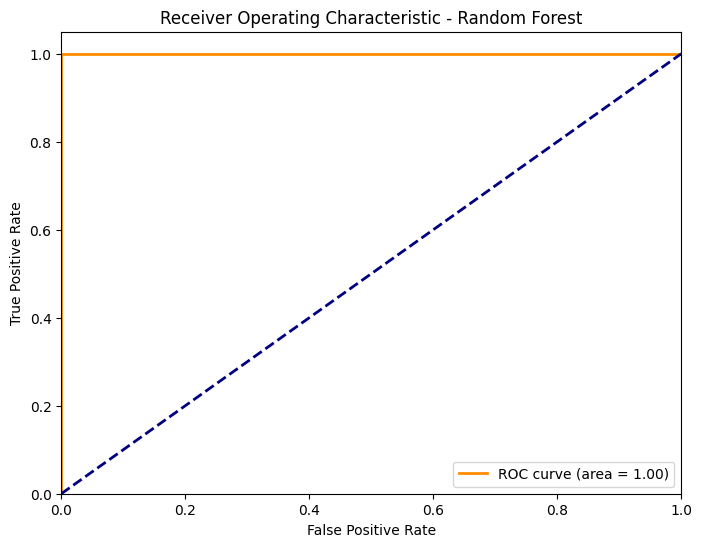


Evaluating Gradient Boosting...
Confusion Matrix for Gradient Boosting:
 [[9251    0]
 [   0 9882]]
Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9251
         1.0       1.00      1.00      1.00      9882

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



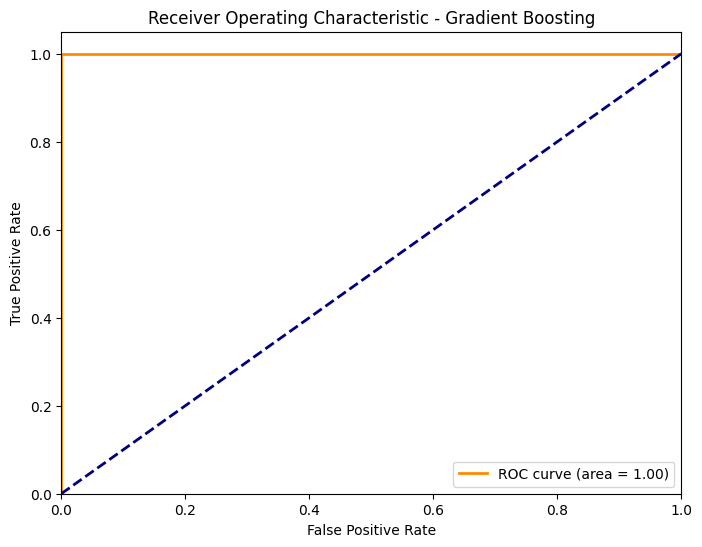


Random Forest Evaluation Metrics:
{'accuracy': 0.99989546856217, 'precision': 1.0, 'recall': 0.9997976118194697, 'f1': 0.9998987956684546, 'roc_auc': np.float64(1.0)}

Gradient Boosting Evaluation Metrics:
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': np.float64(1.0)}


In [61]:
# Evaluate the models
model.compare_models()